# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
import pandas as pd

df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26390,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN
26391,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26392,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
info = pd.read_csv('schema.csv')
info

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
...,...,...,...
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [44]:
education = df[(~df['FormalEducation'].isnull()) & (~df['AdjustedCompensation'].isnull())]
education['FormalEducation'].value_counts()

Master's degree                                                      1990
Bachelor's degree                                                    1107
Doctoral degree                                                       967
Professional degree                                                   130
Some college/university study without earning a bachelor's degree     111
I did not complete any formal education past high school               30
I prefer not to answer                                                  7
Name: FormalEducation, dtype: int64

In [77]:
masters = education[education['FormalEducation'] == "Master's degree"]['AdjustedCompensation']
masters

3        250000.000
14        36634.400
27        53352.000
31        35419.104
37        80000.000
            ...    
26148     54670.000
26159         1.000
26180     65770.430
26255     89686.950
26378     10000.000
Name: AdjustedCompensation, Length: 1990, dtype: float64

In [78]:
bachelors = education[education['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation']
bachelors

8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1107, dtype: float64

In [53]:
masters.describe()

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64

In [54]:
bachelors.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

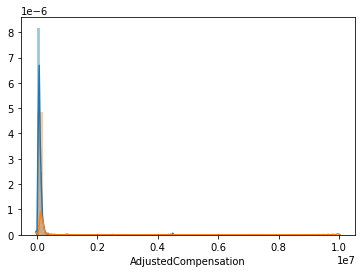

In [56]:
import seaborn as sns
sns.distplot(masters)
sns.distplot(bachelors);

In [79]:
import scipy.stats as stats
import numpy as np

master_z = stats.zscore(masters)
bachelor_z = stats.zscore(bachelors)

master_z = np.abs(master_z)
bachelor_z = np.abs(bachelor_z)

masters_filter = (master_z <3)
bachelors_filter = (bachelor_z <3)

In [80]:
masters = masters[masters_filter]
bachelors = bachelors[bachelors_filter]

In [81]:
len(masters)
len(bachelors)

1104

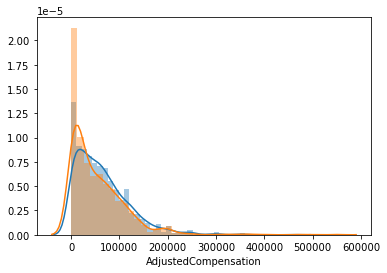

In [82]:
sns.distplot(masters)
sns.distplot(bachelors);

In [83]:

stats.ttest_ind(masters, bachelors, equal_var=False)

Ttest_indResult(statistic=4.526086727760483, pvalue=6.331029413035798e-06)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [105]:
doctoral = education[education['FormalEducation'] == "Doctoral degree"]['AdjustedCompensation']


In [106]:
doctoral_z = stats.zscore(doctoral)
doctoral_z = np.abs(doctoral_z)
doctoral_filter = (doctoral_z <3)
len(doctoral)

967

In [107]:
doctoral = doctoral[doctoral_filter]
len(doctoral)

966

In [108]:
doctoral_z = stats.zscore(doctoral)
doctoral_z = np.abs(doctoral_z)
doctoral_filter = (doctoral_z <3)
len(doctoral)

966

In [109]:
doctoral = doctoral[doctoral_filter]
len(doctoral)

965

In [112]:
doctoral_z = stats.zscore(doctoral)
doctoral_z = np.abs(doctoral_z)
doctoral_filter = (doctoral_z <3)
len(doctoral)

965

In [113]:
doctoral = doctoral[doctoral_filter]
len(doctoral)

954

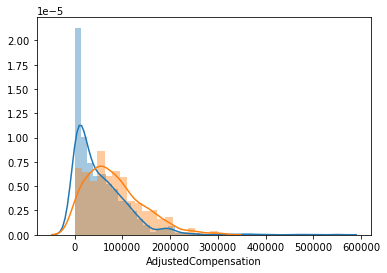

In [114]:
sns.distplot(bachelors)
sns.distplot(doctoral)

In [115]:
stats.ttest_ind(doctoral, bachelors, equal_var=False)

Ttest_indResult(statistic=11.293352731967017, pvalue=1.0409847498721632e-28)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [119]:
temp = df[df['AdjustedCompensation']<=5*10**5]
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!